In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [189]:
# Load data

Contracts = pd.read_csv('contracts.csv')

Contracts

,Name,Age,Position,Team,Contract Start Date,Contract Type,NHL Clause,Way Clause,Term,Total Value,AAV
0,Tristan Luneau,19,RD,ANA,"Sep. 5, 2023",ELC,NaN,2-way,3,"$2,850,000","$896,667"
1,Alex Stalock,35,G,ANA,"Aug. 7, 2023",35+ (UFA),NaN,1-way,1,"$800,000","$800,000"
2,Troy Terry,25,RW,ANA,"Aug. 2, 2023",Stnd (RFA),NaN,1-way,7,"$49,000,000","$7,000,000"
3,Noah Warren,18,RD,ANA,"Jul. 19, 2023",ELC,NaN,2-way,3,"$2,850,000","$896,667"
4,Lukas Dostal,23,G,ANA,"Jul. 16, 2023",Stnd (RFA),NaN,2-way,2,"$1,625,000","$812,500"
...,...,...,...,...,...,...,...,...,...,...,...
9105,Blake Wheeler,24,"RW, C",WPG,"Jul. 15, 2011",Stnd (RFA),NaN,1-way,2,"$5,100,000","$2,550,000"
9106,Brett Festerling,25,D,WPG,"Jul. 14, 2011",Stnd (RFA),NaN,2-way,1,"$577,500","$577,500"
9107,Derek Meech,27,D,WPG,"Jul. 1, 2011",Stnd (RFA),NaN,2-way,1,"$700,000","$700,000"
9108,Tanner Glass,27,LW,WPG,"Jul. 1, 2011",Stnd (UFA),NaN,1-way,1,"$750,000","$750,000"


In [190]:
Contracts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9110 entries, 0 to 9109
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name                 9110 non-null   object
 1   Age                  9110 non-null   int64 
 2   Position             9110 non-null   object
 3   Team                 9110 non-null   object
 4   Contract Start Date  9110 non-null   object
 5   Contract Type        9110 non-null   object
 6   NHL Clause           1962 non-null   object
 7   Way Clause           9110 non-null   object
 8   Term                 9110 non-null   int64 
 9   Total Value          9110 non-null   object
 10  AAV                  9110 non-null   object
dtypes: int64(2), object(9)
memory usage: 783.0+ KB


In [191]:
Contracts['Way Clause'].value_counts()

2-way    5471
1-way    3639
Name: Way Clause, dtype: int64

In [192]:
# Drop every contract besides 1-way

Contracts = Contracts[Contracts['Way Clause'] == '1-way'].reset_index()

Contracts.drop(columns=['Way Clause', 'index'], inplace=True)

Contracts

,Name,Age,Position,Team,Contract Start Date,Contract Type,NHL Clause,Term,Total Value,AAV
0,Alex Stalock,35,G,ANA,"Aug. 7, 2023",35+ (UFA),NaN,1,"$800,000","$800,000"
1,Troy Terry,25,RW,ANA,"Aug. 2, 2023",Stnd (RFA),NaN,7,"$49,000,000","$7,000,000"
2,Robert Hägg,28,LD,ANA,"Jul. 4, 2023",Stnd (UFA),NaN,1,"$775,000","$775,000"
3,Radko Gudas,33,RD,ANA,"Jul. 1, 2023",Stnd (UFA),NaN,3,"$12,000,000","$4,000,000"
4,Alex Killorn,33,"RW, LW",ANA,"Jul. 1, 2023",Stnd (UFA),NaN,4,"$25,000,000","$6,250,000"
...,...,...,...,...,...,...,...,...,...,...
3634,Jim Slater,29,C,WPG,"Jun. 13, 2012",Stnd (UFA),✔,3,"$4,800,000","$1,600,000"
3635,Zach Bogosian,21,RD,WPG,"Sep. 14, 2011",Stnd (RFA),NaN,2,"$5,000,000","$2,500,000"
3636,Kyle Wellwood,28,C,WPG,"Sep. 9, 2011",Stnd (UFA),NaN,1,"$700,000","$700,000"
3637,Blake Wheeler,24,"RW, C",WPG,"Jul. 15, 2011",Stnd (RFA),NaN,2,"$5,100,000","$2,550,000"


## Data Cleaning

In [193]:
# contracts['Contract Start Date'] = pd.to_datetime(contracts['Contract Start Date'])

Contracts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3639 entries, 0 to 3638
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name                 3639 non-null   object
 1   Age                  3639 non-null   int64 
 2   Position             3639 non-null   object
 3   Team                 3639 non-null   object
 4   Contract Start Date  3639 non-null   object
 5   Contract Type        3639 non-null   object
 6   NHL Clause           1350 non-null   object
 7   Term                 3639 non-null   int64 
 8   Total Value          3639 non-null   object
 9   AAV                  3639 non-null   object
dtypes: int64(2), object(8)
memory usage: 284.4+ KB


### Name

In [194]:
Contracts['Name'].nunique()

1609

In [195]:
Contracts['Name'].value_counts().sort_values(ascending=False)

Trevor Lewis        8
Sam Gagner          8
Blake Comeau        8
Patrick Eaves       7
Mattias Janmark     7
                   ..
Vadim Shipachyov    1
Nathan Horton       1
Ian Mitchell        1
Isac Lundeström     1
Brandon Bollig      1
Name: Name, Length: 1609, dtype: int64

In [196]:
# Investigate the most common names
Contracts[Contracts['Name'] == 'Trevor Lewis']


,Name,Age,Position,Team,Contract Start Date,Contract Type,NHL Clause,Term,Total Value,AAV
476,Trevor Lewis,35,"RW, C",CGY,"Jul. 13, 2022",35+ (UFA),NaN,1,"$1,000,000","$800,000"
487,Trevor Lewis,34,"RW, C",CGY,"Jul. 28, 2021",Stnd (UFA),NaN,1,"$800,000","$800,000"
1557,Trevor Lewis,36,"RW, C",LAK,"Jul. 1, 2023",35+ (UFA),NaN,1,"$775,000","$775,000"
1611,Trevor Lewis,29,"RW, C",LAK,"Jun. 25, 2016",Stnd (UFA),✔,4,"$8,000,000","$2,000,000"
1629,Trevor Lewis,27,"RW, C",LAK,"Apr. 8, 2014",Stnd (UFA),✔,2,"$3,050,000","$1,525,000"
1631,Trevor Lewis,26,"RW, C",LAK,"Jul. 23, 2013",Stnd (RFA),NaN,1,"$1,325,000","$1,325,000"
1649,Trevor Lewis,24,"RW, C",LAK,"Jul. 15, 2011",Stnd (RFA),NaN,2,"$1,450,000","$725,000"
3558,Trevor Lewis,33,"RW, C",WPG,"Jan. 13, 2021",Stnd (UFA),NaN,1,"$750,000","$750,000"


It looks like there are two Trevor Lewis' and each row is unique. This is good.

## Year

To make this dataset compatible with the ***`Stats`*** data, we will feature engineer a `Year` variable from the `Contract Start Date` variable

In [197]:
Contracts['Contract Start Date']

0        Aug. 7, 2023
1        Aug. 2, 2023
2        Jul. 4, 2023
3        Jul. 1, 2023
4        Jul. 1, 2023
            ...      
3634    Jun. 13, 2012
3635    Sep. 14, 2011
3636     Sep. 9, 2011
3637    Jul. 15, 2011
3638     Jul. 1, 2011
Name: Contract Start Date, Length: 3639, dtype: object

In [198]:
Contracts['Contract Start Date'] = pd.to_datetime(Contracts['Contract Start Date'])
Contracts['Contract Start Date']

0      2023-08-07
1      2023-08-02
2      2023-07-04
3      2023-07-01
4      2023-07-01
          ...    
3634   2012-06-13
3635   2011-09-14
3636   2011-09-09
3637   2011-07-15
3638   2011-07-01
Name: Contract Start Date, Length: 3639, dtype: datetime64[ns]

In [199]:
Contracts['Year'] = Contracts['Contract Start Date'].dt.year
Contracts

,Name,Age,Position,Team,Contract Start Date,Contract Type,NHL Clause,Term,Total Value,AAV,Year
0,Alex Stalock,35,G,ANA,2023-08-07,35+ (UFA),NaN,1,"$800,000","$800,000",2023
1,Troy Terry,25,RW,ANA,2023-08-02,Stnd (RFA),NaN,7,"$49,000,000","$7,000,000",2023
2,Robert Hägg,28,LD,ANA,2023-07-04,Stnd (UFA),NaN,1,"$775,000","$775,000",2023
3,Radko Gudas,33,RD,ANA,2023-07-01,Stnd (UFA),NaN,3,"$12,000,000","$4,000,000",2023
4,Alex Killorn,33,"RW, LW",ANA,2023-07-01,Stnd (UFA),NaN,4,"$25,000,000","$6,250,000",2023
...,...,...,...,...,...,...,...,...,...,...,...
3634,Jim Slater,29,C,WPG,2012-06-13,Stnd (UFA),✔,3,"$4,800,000","$1,600,000",2012
3635,Zach Bogosian,21,RD,WPG,2011-09-14,Stnd (RFA),NaN,2,"$5,000,000","$2,500,000",2011
3636,Kyle Wellwood,28,C,WPG,2011-09-09,Stnd (UFA),NaN,1,"$700,000","$700,000",2011
3637,Blake Wheeler,24,"RW, C",WPG,2011-07-15,Stnd (RFA),NaN,2,"$5,100,000","$2,550,000",2011


What we must do now is create unique rows for each year of the duration of the contract. The `AAV` will be the salary for each year. We must increment the `Year` and `Age` of player.

In [200]:
# Investigate the most common names
Contracts[Contracts['Name'] == 'Trevor Lewis']


,Name,Age,Position,Team,Contract Start Date,Contract Type,NHL Clause,Term,Total Value,AAV,Year
476,Trevor Lewis,35,"RW, C",CGY,2022-07-13,35+ (UFA),NaN,1,"$1,000,000","$800,000",2022
487,Trevor Lewis,34,"RW, C",CGY,2021-07-28,Stnd (UFA),NaN,1,"$800,000","$800,000",2021
1557,Trevor Lewis,36,"RW, C",LAK,2023-07-01,35+ (UFA),NaN,1,"$775,000","$775,000",2023
1611,Trevor Lewis,29,"RW, C",LAK,2016-06-25,Stnd (UFA),✔,4,"$8,000,000","$2,000,000",2016
1629,Trevor Lewis,27,"RW, C",LAK,2014-04-08,Stnd (UFA),✔,2,"$3,050,000","$1,525,000",2014
1631,Trevor Lewis,26,"RW, C",LAK,2013-07-23,Stnd (RFA),NaN,1,"$1,325,000","$1,325,000",2013
1649,Trevor Lewis,24,"RW, C",LAK,2011-07-15,Stnd (RFA),NaN,2,"$1,450,000","$725,000",2011
3558,Trevor Lewis,33,"RW, C",WPG,2021-01-13,Stnd (UFA),NaN,1,"$750,000","$750,000",2021


In [201]:
Contracts.nunique()

Name                   1609
Age                      26
Position                 26
Team                     31
Contract Start Date    1480
Contract Type             4
NHL Clause                1
Term                     15
Total Value             586
AAV                     444
Year                     16
dtype: int64

In [202]:
# Is every row unique?

Contracts.groupby(['Name', 'Year']).size().sort_values(ascending=False)

Name              Year
Evander Kane      2022    2
Cody Franson      2013    2
Dan Ellis         2013    2
Craig Anderson    2021    2
Vladimír Sobotka  2017    2
                         ..
Michal Rozsíval   2015    1
                  2013    1
                  2012    1
Michal Neuvirth   2017    1
AJ Greer          2022    1
Length: 3622, dtype: int64

In [203]:
# Look into  duplicate rows

Contracts[Contracts['Name'] == 'Evander Kane']

,Name,Age,Position,Team,Contract Start Date,Contract Type,NHL Clause,Term,Total Value,AAV,Year
1316,Evander Kane,30,"LW, RW",EDM,2022-07-12,Stnd (UFA),✔,4,"$20,500,000","$5,125,000",2022
1318,Evander Kane,29,"LW, RW",EDM,2022-01-27,Stnd (UFA),NaN,1,"$1,375,000","$2,108,696",2022
2776,Evander Kane,26,"LW, RW",SJS,2018-05-24,Stnd (UFA),✔,7,"$49,000,000","$7,000,000",2018
3625,Evander Kane,21,"LW, RW",WPG,2012-09-15,Stnd (RFA),NaN,6,"$31,500,000","$5,250,000",2012


We see that a player can sign multiple contracts in a year, therefore we should group unique rows by `Name`, `Month` (of contract signing), `Year`

In [204]:
Contracts['Month'] = Contracts['Contract Start Date'].dt.month
Contracts

,Name,Age,Position,Team,Contract Start Date,Contract Type,NHL Clause,Term,Total Value,AAV,Year,Month
0,Alex Stalock,35,G,ANA,2023-08-07,35+ (UFA),NaN,1,"$800,000","$800,000",2023,8
1,Troy Terry,25,RW,ANA,2023-08-02,Stnd (RFA),NaN,7,"$49,000,000","$7,000,000",2023,8
2,Robert Hägg,28,LD,ANA,2023-07-04,Stnd (UFA),NaN,1,"$775,000","$775,000",2023,7
3,Radko Gudas,33,RD,ANA,2023-07-01,Stnd (UFA),NaN,3,"$12,000,000","$4,000,000",2023,7
4,Alex Killorn,33,"RW, LW",ANA,2023-07-01,Stnd (UFA),NaN,4,"$25,000,000","$6,250,000",2023,7
...,...,...,...,...,...,...,...,...,...,...,...,...
3634,Jim Slater,29,C,WPG,2012-06-13,Stnd (UFA),✔,3,"$4,800,000","$1,600,000",2012,6
3635,Zach Bogosian,21,RD,WPG,2011-09-14,Stnd (RFA),NaN,2,"$5,000,000","$2,500,000",2011,9
3636,Kyle Wellwood,28,C,WPG,2011-09-09,Stnd (UFA),NaN,1,"$700,000","$700,000",2011,9
3637,Blake Wheeler,24,"RW, C",WPG,2011-07-15,Stnd (RFA),NaN,2,"$5,100,000","$2,550,000",2011,7


In [205]:
# Re-test unique rows

Contracts.groupby(['Name', 'Year', 'Month']).size().sort_values(ascending=False)

Name               Year  Month
Vladimír Sobotka   2017  4        2
Zemgus Girgensons  2023  6        1
Fedor Tyutin       2016  7        1
Francis Bouillon   2012  7        1
                   2010  6        1
                                 ..
Micheal Haley      2017  7        1
Micheal Ferland    2019  7        1
                   2017  7        1
                   2015  9        1
AJ Greer           2022  7        1
Length: 3638, dtype: int64

In [206]:
# Outlier

Contracts[Contracts['Name'] == 'Vladimír Sobotka']

,Name,Age,Position,Team,Contract Start Date,Contract Type,NHL Clause,Term,Total Value,AAV,Year,Month
2897,Vladimír Sobotka,28,"LW, C",STL,2017-04-06,Stnd (UFA),NaN,1,"$2,725,000","$2,725,000",2017,4
2898,Vladimír Sobotka,29,"LW, C",STL,2017-04-06,Stnd (UFA),✔,3,"$10,500,000","$3,500,000",2017,4
2923,Vladimír Sobotka,27,"LW, C",STL,2014-07-21,Stnd (RFA),NaN,1,"$2,725,000","$2,725,000",2014,7


In [207]:
# Remove outlier
Contracts.drop(index=2897, inplace=True)
Contracts.reset_index(inplace=True)

Contracts[Contracts['Name'] == 'Vladimír Sobotka']

,index,Name,Age,Position,Team,Contract Start Date,Contract Type,NHL Clause,Term,Total Value,AAV,Year,Month
2897,2898,Vladimír Sobotka,29,"LW, C",STL,2017-04-06,Stnd (UFA),✔,3,"$10,500,000","$3,500,000",2017,4
2922,2923,Vladimír Sobotka,27,"LW, C",STL,2014-07-21,Stnd (RFA),NaN,1,"$2,725,000","$2,725,000",2014,7


In [208]:
# Re-test unique rows

Contracts.groupby(['Name', 'Year', 'Month']).size().sort_values(ascending=False)

Name               Year  Month
Zemgus Girgensons  2023  6        1
Evander Kane       2012  9        1
Francis Bouillon   2013  3        1
                   2012  7        1
                   2010  6        1
                                 ..
Miikka Salomäki    2016  3        1
Micheal Haley      2017  7        1
Micheal Ferland    2019  7        1
                   2017  7        1
AJ Greer           2022  7        1
Length: 3638, dtype: int64

Now every row in our dataset is unique with a primary key of [`Name`, `Year`, `Month`]

In [209]:
Contracts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3638 entries, 0 to 3637
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   index                3638 non-null   int64         
 1   Name                 3638 non-null   object        
 2   Age                  3638 non-null   int64         
 3   Position             3638 non-null   object        
 4   Team                 3638 non-null   object        
 5   Contract Start Date  3638 non-null   datetime64[ns]
 6   Contract Type        3638 non-null   object        
 7   NHL Clause           1350 non-null   object        
 8   Term                 3638 non-null   int64         
 9   Total Value          3638 non-null   object        
 10  AAV                  3638 non-null   object        
 11  Year                 3638 non-null   int64         
 12  Month                3638 non-null   int64         
dtypes: datetime64[ns](1), int64(5), o

## Age

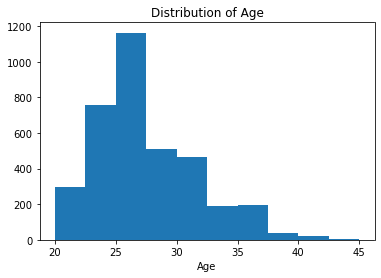

In [210]:
plt.hist(Contracts['Age'])
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.show()

## Position

In [211]:
Contracts['Position'].value_counts()

LD           434
RD           430
G            402
C            339
LW, RW       333
RW           288
RW, LW       260
LW           258
C, LW        191
LD/RD        179
C, RW        131
LW, C         93
D             92
RW, C         85
C, LW, RW     42
LW, RW, C     24
LW, C, RW     14
C, RW, LW     13
RW, LW, C      8
RW, C, LW      8
LW, D          5
LD, LW         3
RD, RW         2
LD/RD, LW      2
RW, RD         1
D, RW          1
Name: Position, dtype: int64

Our Stats dataset already has the updated positions for the players so we might just drop this column

## Team

In [212]:
Contracts['Team'].value_counts()

TOR    155
DET    142
EDM    134
PHI    129
NYI    129
VAN    129
CHI    129
STL    127
ANA    127
NYR    125
NSH    123
MTL    122
BOS    120
DAL    119
FLA    119
WSH    118
CGY    118
COL    117
PIT    113
LAK    113
NJD    112
TBL    112
CAR    109
BUF    109
ARI    107
CBJ    105
MIN    105
OTT    103
WPG    103
SJS    100
VGK     65
Name: Team, dtype: int64

In [213]:
# How mnay teams
Contracts['Team'].nunique()

31

## Contract Start Date

In [214]:
# May just remove this column
Contracts['Contract Start Date']

0      2023-08-07
1      2023-08-02
2      2023-07-04
3      2023-07-01
4      2023-07-01
          ...    
3633   2012-06-13
3634   2011-09-14
3635   2011-09-09
3636   2011-07-15
3637   2011-07-01
Name: Contract Start Date, Length: 3638, dtype: datetime64[ns]

We've already extracted the most important information from this column and stored it into two new variables, therefore we can go ahead and remove this column

In [215]:
Contracts

,index,Name,Age,Position,Team,Contract Start Date,Contract Type,NHL Clause,Term,Total Value,AAV,Year,Month
0,0,Alex Stalock,35,G,ANA,2023-08-07,35+ (UFA),NaN,1,"$800,000","$800,000",2023,8
1,1,Troy Terry,25,RW,ANA,2023-08-02,Stnd (RFA),NaN,7,"$49,000,000","$7,000,000",2023,8
2,2,Robert Hägg,28,LD,ANA,2023-07-04,Stnd (UFA),NaN,1,"$775,000","$775,000",2023,7
3,3,Radko Gudas,33,RD,ANA,2023-07-01,Stnd (UFA),NaN,3,"$12,000,000","$4,000,000",2023,7
4,4,Alex Killorn,33,"RW, LW",ANA,2023-07-01,Stnd (UFA),NaN,4,"$25,000,000","$6,250,000",2023,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3633,3634,Jim Slater,29,C,WPG,2012-06-13,Stnd (UFA),✔,3,"$4,800,000","$1,600,000",2012,6
3634,3635,Zach Bogosian,21,RD,WPG,2011-09-14,Stnd (RFA),NaN,2,"$5,000,000","$2,500,000",2011,9
3635,3636,Kyle Wellwood,28,C,WPG,2011-09-09,Stnd (UFA),NaN,1,"$700,000","$700,000",2011,9
3636,3637,Blake Wheeler,24,"RW, C",WPG,2011-07-15,Stnd (RFA),NaN,2,"$5,100,000","$2,550,000",2011,7


In [216]:
Contracts.drop(columns=['index', 'Contract Start Date'], inplace=True)

Contracts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3638 entries, 0 to 3637
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           3638 non-null   object
 1   Age            3638 non-null   int64 
 2   Position       3638 non-null   object
 3   Team           3638 non-null   object
 4   Contract Type  3638 non-null   object
 5   NHL Clause     1350 non-null   object
 6   Term           3638 non-null   int64 
 7   Total Value    3638 non-null   object
 8   AAV            3638 non-null   object
 9   Year           3638 non-null   int64 
 10  Month          3638 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 312.8+ KB


## Contract Type

In [217]:
Contracts['Contract Type'].value_counts()

Stnd (UFA)    1790
Stnd (RFA)    1585
35+ (UFA)      262
35+ (RFA)        1
Name: Contract Type, dtype: int64

Don't know how relevant this feature is, but it contains no null values so we'll keep it for now

## NHL Clause

In [218]:
Contracts['NHL Clause'].value_counts()

✔    1350
Name: NHL Clause, dtype: int64

In [219]:
Contracts[Contracts['NHL Clause'].isnull()]

,Name,Age,Position,Team,Contract Type,NHL Clause,Term,Total Value,AAV,Year,Month
0,Alex Stalock,35,G,ANA,35+ (UFA),NaN,1,"$800,000","$800,000",2023,8
1,Troy Terry,25,RW,ANA,Stnd (RFA),NaN,7,"$49,000,000","$7,000,000",2023,8
2,Robert Hägg,28,LD,ANA,Stnd (UFA),NaN,1,"$775,000","$775,000",2023,7
3,Radko Gudas,33,RD,ANA,Stnd (UFA),NaN,3,"$12,000,000","$4,000,000",2023,7
4,Alex Killorn,33,"RW, LW",ANA,Stnd (UFA),NaN,4,"$25,000,000","$6,250,000",2023,7
...,...,...,...,...,...,...,...,...,...,...,...
3631,Olli Jokinen,33,C,WPG,Stnd (UFA),NaN,2,"$9,000,000","$4,500,000",2012,7
3634,Zach Bogosian,21,RD,WPG,Stnd (RFA),NaN,2,"$5,000,000","$2,500,000",2011,9
3635,Kyle Wellwood,28,C,WPG,Stnd (UFA),NaN,1,"$700,000","$700,000",2011,9
3636,Blake Wheeler,24,"RW, C",WPG,Stnd (RFA),NaN,2,"$5,100,000","$2,550,000",2011,7


Since there are only two values for this variable, we can turn it into a binary variable where 1 = yes, 0 = no clause.

In [220]:
Contracts['NHL Clause'] = Contracts['NHL Clause'].apply(lambda x: 0 if pd.isna(x) else 1)

Contracts['NHL Clause'].value_counts()

0    2288
1    1350
Name: NHL Clause, dtype: int64

## Term

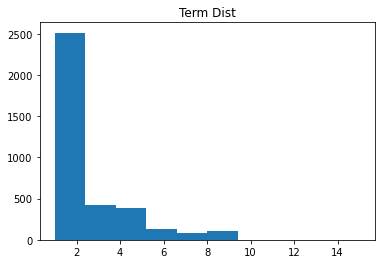

In [221]:
plt.hist(Contracts['Term'])
plt.title('Term Dist')
plt.show()

In [222]:
max(Contracts['Term'])

15

In [223]:
Contracts[Contracts['Term'] == 15]

,Name,Age,Position,Team,Contract Type,NHL Clause,Term,Total Value,AAV,Year,Month
2124,Ilya Kovalchuk,27,"LW, RW",NJD,Stnd (UFA),0,15,"$100,000,000","$6,666,666",2010,9


In [224]:
Contracts[Contracts['Name'] == 'Ilya Kovalchuk']

,Name,Age,Position,Team,Contract Type,NHL Clause,Term,Total Value,AAV,Year,Month
1596,Ilya Kovalchuk,35,"LW, RW",LAK,35+ (UFA),0,3,"$18,750,000","$6,250,000",2018,7
2124,Ilya Kovalchuk,27,"LW, RW",NJD,Stnd (UFA),0,15,"$100,000,000","$6,666,666",2010,9


In [225]:
Contracts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3638 entries, 0 to 3637
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           3638 non-null   object
 1   Age            3638 non-null   int64 
 2   Position       3638 non-null   object
 3   Team           3638 non-null   object
 4   Contract Type  3638 non-null   object
 5   NHL Clause     3638 non-null   int64 
 6   Term           3638 non-null   int64 
 7   Total Value    3638 non-null   object
 8   AAV            3638 non-null   object
 9   Year           3638 non-null   int64 
 10  Month          3638 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 312.8+ KB


## Total Value

In [226]:
Contracts['Total Value']

0          $800,000
1       $49,000,000
2          $775,000
3       $12,000,000
4       $25,000,000
           ...     
3633     $4,800,000
3634     $5,000,000
3635       $700,000
3636     $5,100,000
3637       $750,000
Name: Total Value, Length: 3638, dtype: object

This variable should be an integer

In [227]:
Contracts['Total Value'] = Contracts['Total Value'].str.replace('$', '').str.replace(',', '')
Contracts['Total Value'] = Contracts['Total Value'].astype(int)

Contracts['Total Value']

0         800000
1       49000000
2         775000
3       12000000
4       25000000
          ...   
3633     4800000
3634     5000000
3635      700000
3636     5100000
3637      750000
Name: Total Value, Length: 3638, dtype: int64

## AAV

In [228]:
Contracts['AAV']

0         $800,000
1       $7,000,000
2         $775,000
3       $4,000,000
4       $6,250,000
           ...    
3633    $1,600,000
3634    $2,500,000
3635      $700,000
3636    $2,550,000
3637      $750,000
Name: AAV, Length: 3638, dtype: object

Again, this should be transformed like our `Total Value` variable into an int

In [229]:
Contracts['AAV'] = Contracts['AAV'].str.replace('$', '').str.replace(',', '')
Contracts['AAV'] = Contracts['AAV'].astype(int)

Contracts['AAV']

0        800000
1       7000000
2        775000
3       4000000
4       6250000
         ...   
3633    1600000
3634    2500000
3635     700000
3636    2550000
3637     750000
Name: AAV, Length: 3638, dtype: int64

We know that the remaining variables `Year` and `Month` are clean because we feature engineered them. Now we can export the csv

# Exporting CSV

In [230]:
# exporting non-dup df to csv

Contracts.to_csv('contract_data_non_null.csv', index=False)

In [109]:
# Gini Impurity example (slide 41 DS 310)

t1 = 1 - ((1/2)**2 + (1/2)**2)

t2 = 1 - ((3/5)**2 + (2/5)**2) 

t4 = 1 - ((5/6)**2 + (1/6)**2)

In [110]:
t1

0.5

In [111]:
t2

0.48

In [112]:
t4

0.2777777777777777

In [113]:
# Entropy

t1 = -((5/10)*(np.log(5/10)) - (5/10)*(np.log(5/10)))

In [114]:
t1

-0.0